# Ridge Regression

In [249]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [251]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]


In [252]:
df = pd.DataFrame(data , columns =columns)

In [253]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [254]:
df = df.dropna()


In [255]:
x = df
y = target
          
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [256]:
print("X shape:", x.shape)   # should be (506, 13)
print("y shape:", y.shape)   # should be (506,)

X shape: (506, 13)
y shape: (506,)


In [263]:
from sklearn.model_selection import train_test_split

In [265]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=.30,random_state=3)

In [267]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (354, 13)
y_train: (354,)


In [269]:
from sklearn.preprocessing  import StandardScaler

In [271]:
scaler = StandardScaler()

In [273]:
x_train = scaler.fit_transform(x_train)

In [275]:
x_test = scaler.transform(x_test)

In [277]:
from sklearn.linear_model import Ridge

In [279]:
from sklearn.model_selection import GridSearchCV

In [281]:
ridge_regressor = Ridge()

In [283]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

In [285]:
ridgecv = GridSearchCV(ridge_regressor, parameters,scoring='neg_mean_squared_error', cv=5)

ridgecv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [287]:
print(ridgecv.best_params_)

{'alpha': 5}


In [289]:
print(ridgecv.best_score_)

-25.155884154406532


In [291]:
pred=ridgecv.predict(x_test)

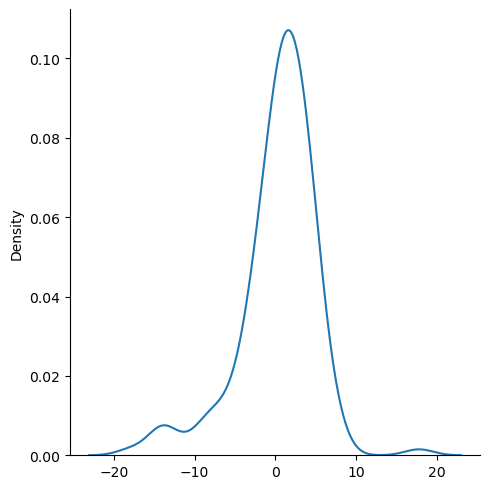

In [293]:
import seaborn as sns
sns.displot(pred-y_test,kind='kde')

In [295]:
from sklearn.metrics import r2_score

In [297]:
score=r2_score(pred,y_test)

In [299]:
score

0.6133461847297563

# lasso Regression

In [305]:
from sklearn.linear_model import Lasso

In [307]:
lasso = Lasso()

In [309]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)

lassocv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [315]:
print(lassocv.best_params_)

{'alpha': 1}


In [317]:
print(lassocv.best_score_)

-30.36751691662896


In [319]:
pred=lassocv.predict(x_test)

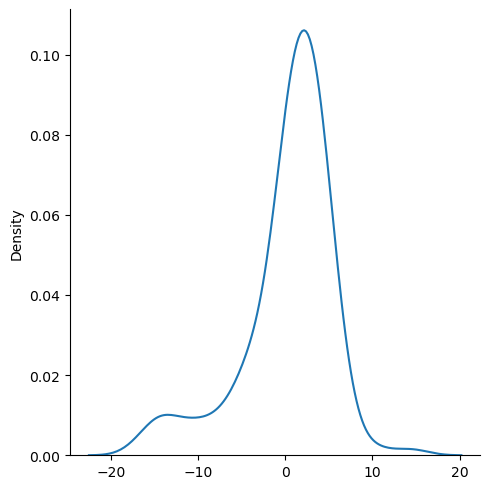

In [321]:
import seaborn as sns
sns.displot(pred-y_test,kind='kde')

In [323]:
score=r2_score(pred,y_test)

In [325]:
score

0.3896150507775932